In [1]:
import KeypointUtil as kpu

In [2]:
import matplotlib.pyplot as plot
plot.style.use('default')
%matplotlib inline

In [3]:
files = \
{
  'db'   :               'data/db/keypoint-sample.sqlite3'
, 'image': { 'openpose': 'data/db/keypoint-sample.tar.xz' }
}

In [4]:
q = kpu.Q(*files.values())

In [5]:
constraints = \
[
 lambda Q : ( Q._set == 'elderfall'      , Q._category == 'outdoor_fall', Q._video ==   5777, Q._camera == 1 ) ,
 lambda Q : ( Q._set == 'elderfall'      , Q._category == 'indoor_fall' , Q._video ==   5824, Q._camera == 1 ) ,
#lambda Q : ( Q._set == 'elderfall-extra', Q._category == ''            , Q._video == 113110, Q._camera == 1 ) ,

 lambda Q : ( Q._set == 'URFall'         , Q._category == 'fall'        , Q._video ==  4    , Q._camera == 0 ) , # video  <- 14
 lambda Q : ( Q._set == 'Lancet-5'       , Q._category == ''            , Q._video ==  2    , Q._camera == 1 ) , # video  <-  3
 lambda Q : ( Q._set == 'MultiCam'       , Q._category == 'chute'       , Q._video == 19    , Q._camera == 6 ) , # frames -> 759, 549

#lambda Q : ( Q._set == 'Joannie'        , Q._category == ''            , Q._video ==  3    , Q._camera == 1 ) ,
 lambda Q : ( Q._set == 'FDD'            , Q._category == 'Office'      , Q._video ==  3    , Q._camera == 1, Q._run == 2 ) ,
 lambda Q : ( Q._set == 'URFall'         , Q._category == 'fall'        , Q._video == 14    , Q._camera == 0 ) ,
]

constraint = constraints[0]

In [6]:
q.constraint(constraint,verbose=True);

 ... shape                     [DONE] ( 0.00s)
 ... annotation                [DONE] ( 0.00s)
 ... keypoint                  [DONE] ( 0.11s)
 ... bounding box (SSD)        [DONE] ( 3.33s)
 ... bounding box (MRCNN)      [DONE] (17.20s)
 ... bounding box (combined)   [DONE] ( 2.63s)
 ... keypoint <-> bbox         [DONE] ( 0.00s)
 ... video db                  [DONE] ( 0.67s)


Total duration: 325
Identified:
 ... neither   :   43
 ... bboxMRCNN :   26 (solo) \/  281 (total)
 ... bboxSSD   :    1 (solo) /\  256 (total)
 ... both      :  255 (intersection)
 ... either    :  282 (union)
----------------------------------------------------------------


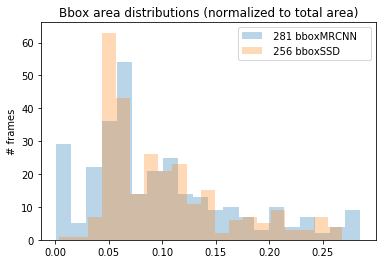



START   END  SPAN
    0     0     1      
    1    14    14 ___/ .....
   15    46    32      
   47   314   268 ___/ ....................................................................................................
  315   324    10      


In [7]:
q.bboxStats(verbose=True);

In [8]:
q.kpStats(0.5,verbose=True,group_by='level',confidence=True);


Frame: 162 (162) of 325
                    nose  neck   eye  shoulder  elbow  wrist  hip  knee  ankle    foot
                    ------------------------------------------------------------------
 0 (1137, 494) [23]    █     ▇  ███░        ▇▇     █░     █░  ▇▇▇    ▇█     ██  ▆▆▆▇▇▇


# Exploration control:

<table>
<tr>
 <td><img src="data/ipynb/img/openpose-explore-control-summary.png" width="450" /></td>
 <td><img src="data/ipynb/img/openpose-explore-image.png" width="450" /></td>
 <td><img src="data/ipynb/img/openpose-explore-video.png" width="450" /></td>
</tr>
</table>

In [9]:
q.explore(scale=0.35)

_Explore_ not implemented in this version


In [10]:
q.matched()

_Matched_ not implemented in this version


# data points: 325
CACHED:  ('elderfall', 'outdoor_fall', 5777, 1)
Elapsed: 1.107s


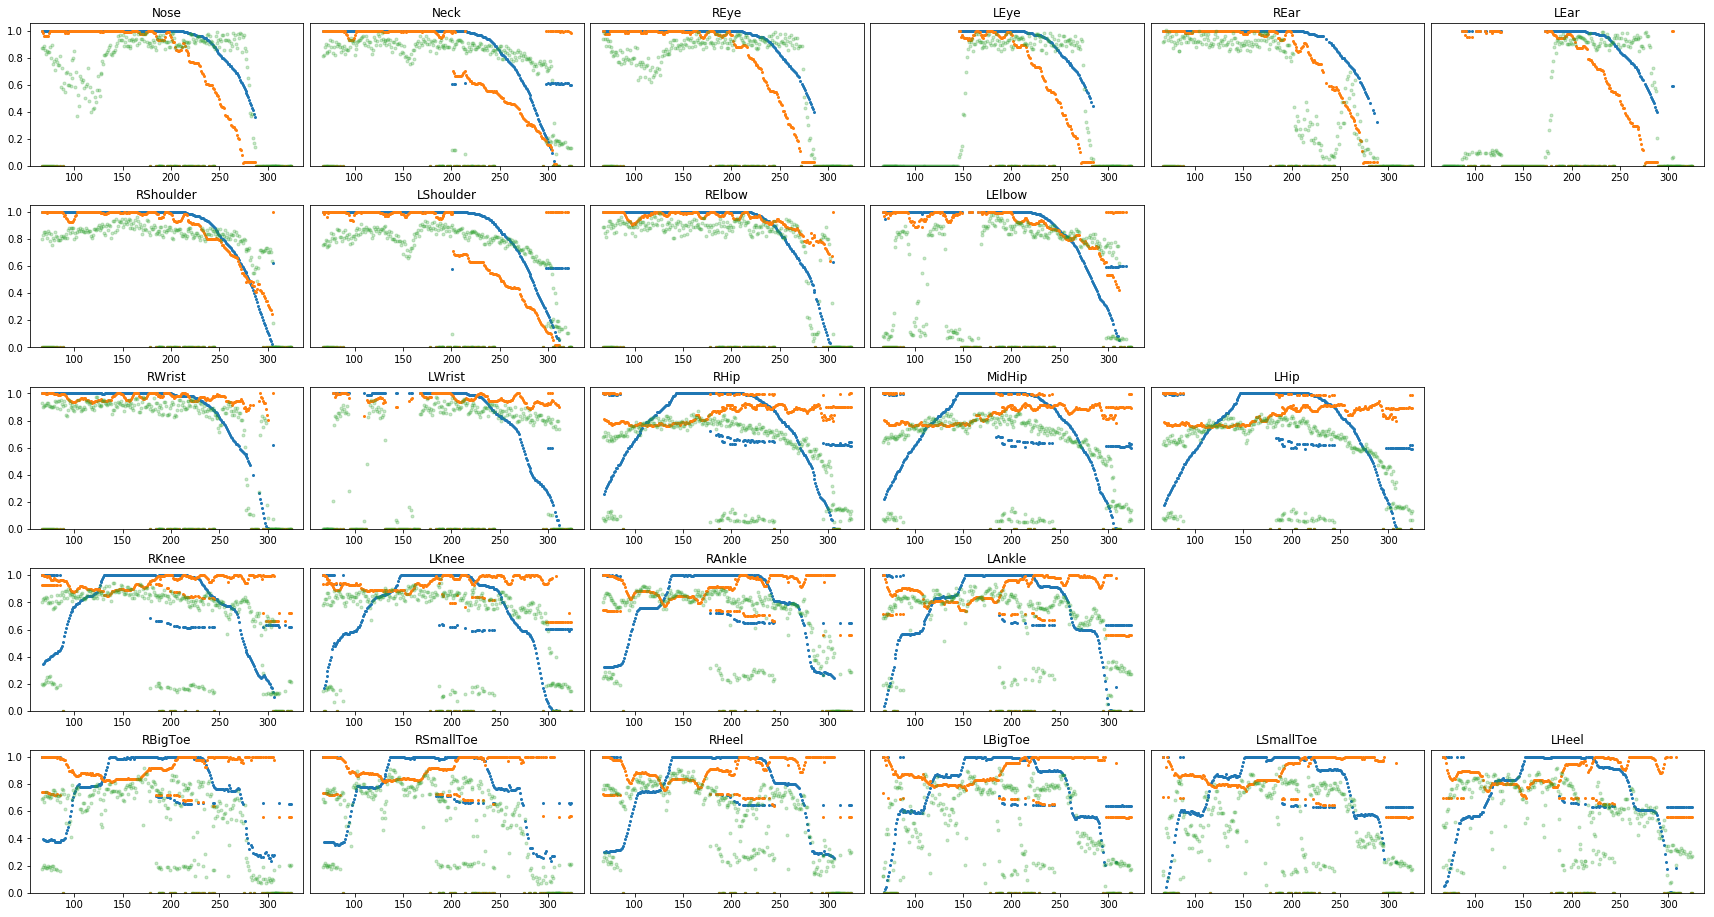

In [11]:
#
# Original, range = [50,None]
#
q.plot(cut=2.5,s=50,anchor=None,window=None)

RELOAD:  ('elderfall', 'outdoor_fall', 5777, 1)
Elapsed: 0.503s


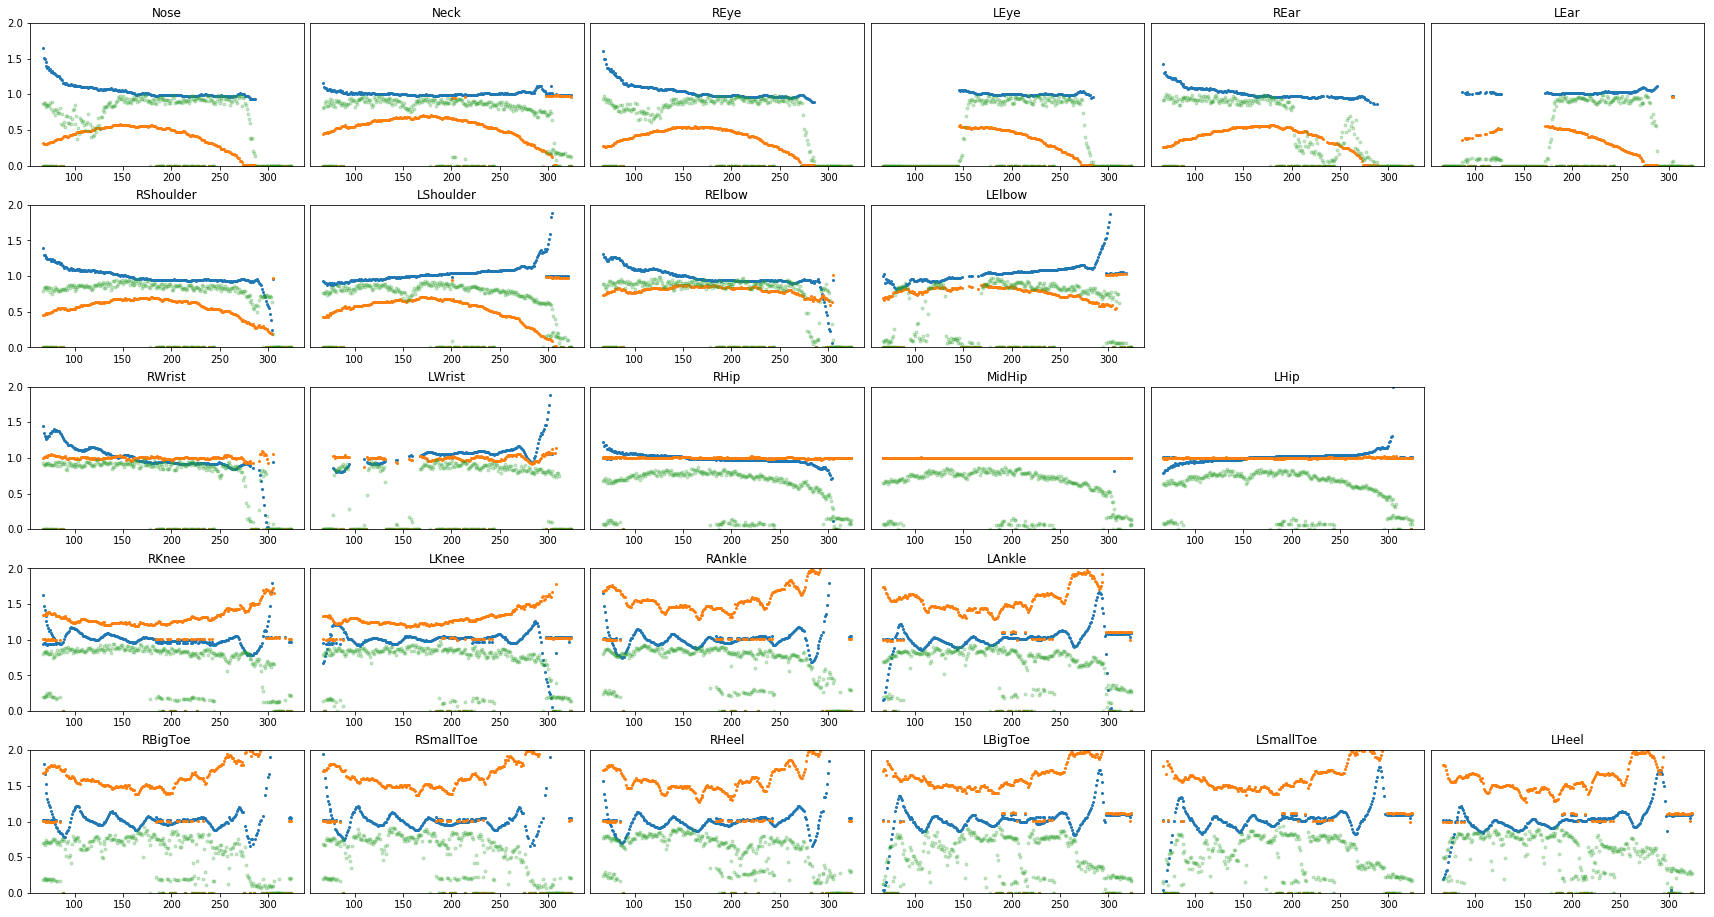

In [12]:
#
# Rescaled (window=1), anchored at hip, range = [50,None]
#
q.plot(cut=2.5,s=50,anchor='hip',window=1)